# Business Understanding

Anggaplah kita merupakan seorang Data Scientist dari perusahaan e-commerce Tokopedia, perusahaan sudah menguji coba 5 jenis kampanye pemasaran ( promosi ) yang berbeda di satu waktu secara bersamaan di bulan lalu. Saat ini, perusahaan ingin melihat promosi mana yang paling sering diikuti oleh customer.

Perusahaan juga membutuhkan mesin prediksi apakah customer yang datang dan beraktivitas di website perusahaan berpeluang menggunakan jenis promosi yang mana antara promosi ke 1 - 5. Agar, perusahaan tidak membuang - buang biaya promosi jika kelima jenis promosi tersebut terus di promosikan setiap hari, dan tentu saja untuk menghindari kerugian besar namun tetap mempertahankan customer yang setia serta menarik customer baru.

Anggap saja kolom campaign ke- :     

1. 1 = diskon 50%
2. 2 = beli 1 gratis 1
3. 3 = flash sale
4. 4 = free ongkir
5. 5 = cashback 30%

# Data Understanding

- **registration_id:** *ID unik yang digunakan untuk mengidentifikasi pelanggan.*

Format: String.

Contoh: RK20202344.

- **name:** *Nama lengkap pelanggan.*

Format: String.

Contoh: Fakhrul Fandy Widyaningtias.

- **email:** *Alamat email pelanggan.*

Format: String.

Contoh: fakhrulfandywidyaningtias@outlook.com.

- **phone:** *Nomor telepon pelanggan.*

Format: Float (dengan angka besar, mungkin perlu format ulang untuk menyimpan
tanpa notasi ilmiah).

Contoh: 6285244221090.

- **age:** *Usia pelanggan.*

Format: Float.

Contoh: 27.0.

- **income_group:** *Kelompok penghasilan pelanggan (kategori numerik).*

Format: Integer.

Contoh: 2 (kelompok penghasilan kedua).

- **active:** *Status aktif pelanggan (apakah pelanggan aktif).*

Format: Boolean.

Contoh: True.

- **city:** *Kota tempat tinggal pelanggan.*

Format: String.

Contoh: Tanjungpinang.

- **province:** *Provinsi tempat tinggal pelanggan.*

Format: String.

Contoh: Kepulauan Riau.

- **hobby:** *Hobi pelanggan.*

Format: String.

Contoh: Amateur radio.

- **fav_movie:** *Film favorit pelanggan.*

Format: String.

Contoh: The Godfather.

- **website_visit_count:** *Jumlah kunjungan pelanggan ke website.*

Format: Integer.

Contoh: 51.

- **website_recency:** *Jumlah hari sejak terakhir kali pelanggan mengunjungi website.*

Format: Integer.

Contoh: 75.

- **website_purchase_rate:** *Rasio pembelian pelanggan terhadap kunjungan website.*

Format: Float.

Contoh: 0.68 (68%).

- **website_purchase_amount:** *Total nilai pembelian pelanggan di website.*

Format: Integer.

Contoh: 612000 (Rp 612.000).

- **website_cs_call_count:** *Jumlah panggilan pelanggan ke customer service.*

Format: Integer.

Contoh: 1.

- **accept_campaign_1 hingga accept_campaign_5:** *Status apakah pelanggan menerima atau berpartisipasi dalam kampanye pemasaran tertentu.*

Format: Boolean.

Contoh: True (menerima kampanye).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
from scipy.stats import zscore
import warnings

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from lifelines.utils import concordance_index
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import multilabel_confusion_matrix

# JCOPML Package
from jcopml.plot import plot_missing_value
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp
from jcopml.feature_importance import mean_loss_decrease
from jcopml.feature_importance import mean_score_decrease
from jcopml.tuning import bayes_search_params as bsp
from jcopml.tuning import grid_search_params as gsp

# Data Preparation

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/krishna0604/dataset_advanced/refs/heads/main/data_customers_csv.csv")

In [ ]:
df.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,...,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
0,RK20202344,Fakhrul Fandy Widyaningtias,fakhrulfandywidyaningtias@outlook.com,6.285244e+09,27.0,2,False,Tanjungpinang,Kepulauan Riau,Amateur radio,...,51,75,0.68,612000,1,True,False,True,True,False
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,Jawa Barat,Animation,...,88,3,0.51,51000,3,True,False,False,True,False
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,Jakarta,Anime,...,30,19,0.69,276000,1,False,True,False,True,False
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,Lampung,Aquascaping,...,63,7,0.80,3200,3,False,True,True,True,True
4,RK20202348,Jeremiah Dinanti,jeremia@rakamin.com,6.285245e+09,25.0,2,False,Malang,Jawa Timur,Art,...,99,81,0.15,105000,2,True,True,True,True,True


In [ ]:
df.shape

(107, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   registration_id          107 non-null    object 
 1   name                     107 non-null    object 
 2   email                    107 non-null    object 
 3   phone                    104 non-null    float64
 4   age                      106 non-null    float64
 5   income_group             107 non-null    int64  
 6   active                   107 non-null    bool   
 7   city                     107 non-null    object 
 8   province                 107 non-null    object 
 9   hobby                    102 non-null    object 
 10  fav_movie                69 non-null     object 
 11  website_visit_count      107 non-null    int64  
 12  website_recency          107 non-null    int64  
 13  website_purchase_rate    107 non-null    float64
 14  website_purchase_amount  1

Insight :    

1. Terdapat 107 baris dan 21 Kolom

2. Terdapat Missing Data pada kolom phone (3 values), age (1 values), hobby (5 values), dan fav_movie (38 values)

In [ ]:
df.describe()

,phone,age,income_group,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count
count,1.040000e+02,106.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000
mean,6.123076e+09,33.132075,2.803738,51.831776,20.130841,0.675794,8.322712e+05,0.663551
std,9.515607e+08,11.480895,1.216547,29.269562,18.765225,0.243338,1.713776e+06,1.132237
min,6.284456e+08,15.000000,1.000000,5.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,6.285234e+09,24.250000,2.000000,24.500000,7.500000,0.610000,1.125000e+05,0.000000
50%,6.286627e+09,33.000000,3.000000,49.000000,17.000000,0.720000,3.400000e+05,0.000000
75%,6.287881e+09,43.750000,4.000000,74.000000,25.000000,0.830000,6.265000e+05,1.000000
max,6.289633e+09,57.000000,5.000000,100.000000,93.000000,1.000000,9.500000e+06,3.000000


In [ ]:
for i in df:
  print(f'''nilai unik dari kolom {i}''')
  print(df[i].unique())
  print()

nilai unik dari kolom registration_id
['RK20202344' 'RK20202345' 'RK20202346' 'RK20202347' 'RK20202348'
 'RK20202349' 'RK20202350' 'RK20202351' 'RK20202352' 'RK20202353'
 'RK20202354' 'RK20202355' 'RK20202356' 'RK20202357' 'RK20202358'
 'RK20202359' 'RK20202360' 'RK20202361' 'RK20202362' 'RK20202363'
 'RK20202364' 'RK20202365' 'RK20202366' 'RK20202367' 'RK20202368'
 'RK20202369' 'RK20202370' 'RK20202371' 'RK20202372' 'RK20202373'
 'RK20202374' 'RK20202375' 'RK20202376' 'RK20202377' 'RK20202378'
 'RK20202379' 'RK20202380' 'RK20202381' 'RK20202382' 'RK20202383'
 'RK20202384' 'RK20202385' 'RK20202386' 'RK20202387' 'RK20202388'
 'RK20202389' 'RK20202390' 'RK20202391' 'RK20202392' 'RK20202393'
 'RK20202394' 'RK20202395' 'RK20202396' 'RK20202397' 'RK20202398'
 'RK20202399' 'RK20202400' 'RK20202401' 'RK20202402' 'RK20202403'
 'RK20202404' 'RK20202405' 'RK20202406' 'RK20202407' 'RK20202408'
 'RK20202409' 'RK20202410' 'RK20202411' 'RK20202412' 'RK20202413'
 'RK20202414' 'RK20202415' 'RK20202416

Insight :    

1. Customer berada pada rentang usia 15 - 57 tahun.

2. Income Group terdiri dari 5 grup, 1 - 5

3. Kunjungan ke website pada rentang 0 - 100 kali dengan rata" nya adalah 51 kali ( make sense )

4. Jumlah hari sejak terakhir kali berkunjung ke website ( website_recency ) adalah 0 - 93 hari.

## Data Cleaning

### a.) Handle Missing Values

Sebelumnya telah diketahui bahwa : Terdapat Missing Data pada kolom phone (3 values), age (1 values), dan hobby (5 values), dan fav_movie (38 values)

In [ ]:
df.isnull().sum()

registration_id             0
name                        0
email                       0
phone                       3
age                         1
income_group                0
active                      0
city                        0
province                    0
hobby                       5
fav_movie                  38
website_visit_count         0
website_recency             0
website_purchase_rate       0
website_purchase_amount     0
website_cs_call_count       0
accept_campaign_1           0
accept_campaign_2           0
accept_campaign_3           0
accept_campaign_4           0
accept_campaign_5           0
dtype: int64

Handle dengan :    

1. Menghapus baris phone, karena kemungkinan customer tanpa menggunakan nomor telepon adalah customer yang tidak terlalu dipercaya + menhapus 3 dari 107 baris tidak akan menghilangkan banyak infromasi

2. Mengisi null value pada kolom age dengan rata" karena missing valuenya hanya ada 1 dari 107 baris

3. Mengisi null value pada kolom hobby dengan modus karena tipe datanya adalah object

4. Menghapus kolom fav_movie karena nama film tidak ada hubungannya dengan daya beli customer dan akan sangat berpengaruh jika null values tersebut dihapus yang berarti harus menghapus 38 dari 107 baris dan akan mengurangi informasi.

Handle Missing Values Phone :

In [ ]:
df = df[df['phone'].notna() & (df['phone'] != '')]

Insight : Karena kebetulan baris kolom age yang kosong juga merupakan informasi dari baris kolom phone yang kosong dan ikut terhapus, maka handle missing value kolom age tidak lagi diperlukan.

Handle Missing Values kolom Hobby :

In [ ]:
most_frequent_value = df['hobby'].mode()[0]
most_frequent_value

'Ghost hunting'

Insight : Ghost Hunting adalah hobby yang paling banyak disukai, maka Ghost Hunting adalah modus.

In [ ]:
df['hobby'] = df['hobby'].fillna(most_frequent_value)

Menghapus kolom fav_movie

In [ ]:
df.drop(columns=['fav_movie'], inplace=True)

In [ ]:
print("----------------")
df.shape

----------------


(104, 20)

Hasil akhir dari handle missing values adalah berkurangnya baris dari 107 baris menjadi 104. Hal ini tidak merubah banyak infromasi pada data dan data sudah bersih dari missng values

### b.) Handle Duplicates

In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
for i in df:
  print(f'''duplikasi dari kolom {i}''')
  print(df.loc[df[i].duplicated()])
  print()

duplikasi dari kolom registration_id
   registration_id                     name  \
8       RK20202351  Dikposa Yosua Krisnanto   
39      RK20202381              Jova Imania   
42      RK20202383          Garin Sugiyanto   
52      RK20202392             Sigit Amalia   
92      RK20202431           Prima Hermawan   
93      RK20202431           Prima Hermawan   

                                email         phone   age  income_group  \
8   dikposayosuakrisnanto@hotmail.com  6.281907e+09  28.0             2   
39               jovaimania@gmail.com  6.284688e+08  17.0             1   
42           garinsugiyanto@yahoo.com  6.287881e+09  33.0             3   
52          sigitamalia@roketmail.com  6.287893e+09  48.0             4   
92       primahermawan@rocketmail.com  6.281856e+09  50.0             5   
93       primahermawan@rocketmail.com  6.281856e+09  50.0             5   

    active                             city          province           hobby  \
8    False  Kota Administr

Betul, terdapat 6 kolom yang memiliki values dan informasi yang sama sehingga dianggap sebagai kolom yang berduplikat. Kita ambil contoh kolom nama dengan nama Dikposa Yosua Krisnanto

In [ ]:
df.loc[df["name"]=="Dikposa Yosua Krisnanto"]

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
7,RK20202351,Dikposa Yosua Krisnanto,dikposayosuakrisnanto@hotmail.com,6.281907e+09,28.0,2,False,Kota Administrasi Jakarta Pusat,Jakarta,Fingerpainting,70,57,0.0,0,0,False,False,False,False,False
8,RK20202351,Dikposa Yosua Krisnanto,dikposayosuakrisnanto@hotmail.com,6.281907e+09,28.0,2,False,Kota Administrasi Jakarta Pusat,Jakarta,Fingerpainting,70,57,0.0,0,0,False,False,False,False,False


Karena ada 2 baris dengan value yang sama, maka akan dihapus salah satunya ( indeks 8 dihapus,ke-7 tidak ). Oleh karena itu, handle duplicates sangat penting dan tidak akan mengubah informasi apapun ketika baris duplikat dihapus

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.loc[df["name"]=="Dikposa Yosua Krisnanto"]

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
7,RK20202351,Dikposa Yosua Krisnanto,dikposayosuakrisnanto@hotmail.com,6.281907e+09,28.0,2,False,Kota Administrasi Jakarta Pusat,Jakarta,Fingerpainting,70,57,0.0,0,0,False,False,False,False,False


In [ ]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

Setelah data sudah bersih, maka saatnya untuk mengambil insight lebih banyak menggunakan visualisasi data. Karena di dalam data ini tidak ada kolom / variabel tanggal-bulan-tahun (time series) maka line chart tidak akan diaplikasikan

Sesuai dengan informasi pada bagian Business Understanding : perusahaan sudah menguji coba 5 jenis kampanye pemasaran ( promosi ) yang berbeda di satu waktu secara bersamaan di bulan lalu. Saat ini, perusahaan ingin melihat promosi mana yang paling sering diikuti oleh customer. Maka saatnya untuk membuat visualisasinya

In [ ]:
df.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
0,RK20202344,Fakhrul Fandy Widyaningtias,fakhrulfandywidyaningtias@outlook.com,6.285244e+09,27.0,2,False,Tanjungpinang,Kepulauan Riau,Amateur radio,51,75,0.68,612000,1,True,False,True,True,False
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,Jawa Barat,Animation,88,3,0.51,51000,3,True,False,False,True,False
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,Jakarta,Anime,30,19,0.69,276000,1,False,True,False,True,False
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,Lampung,Aquascaping,63,7,0.80,3200,3,False,True,True,True,True
4,RK20202348,Jeremiah Dinanti,jeremia@rakamin.com,6.285245e+09,25.0,2,False,Malang,Jawa Timur,Art,99,81,0.15,105000,2,True,True,True,True,True


In [ ]:
partisipasi_kampanye = df[['accept_campaign_1', 'accept_campaign_2', 'accept_campaign_3', 'accept_campaign_4', 'accept_campaign_5']].sum()

partisipasi_kampanye = partisipasi_kampanye.reset_index()
partisipasi_kampanye.columns = ['kampanye', 'jumlah_customer']

print(partisipasi_kampanye)

            kampanye  jumlah_customer
0  accept_campaign_1               50
1  accept_campaign_2               50
2  accept_campaign_3               51
3  accept_campaign_4               50
4  accept_campaign_5               47


Insight = Campaign yang paling disukai oleh customer adalah campaign nomor 3 ( flash sale ) dan campaign 5 ( cashback 30% ) adalah campaign yang paling tidak disukai oleh customer

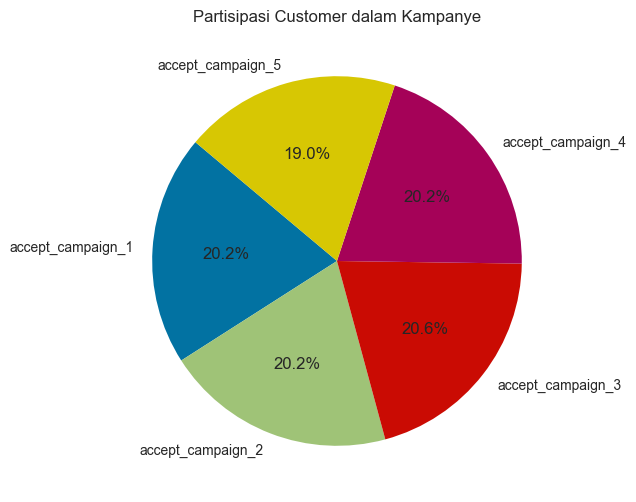

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(partisipasi_kampanye['jumlah_customer'],
        labels=partisipasi_kampanye['kampanye'],
        autopct='%1.1f%%',
        startangle=140)

plt.title('Partisipasi Customer dalam Kampanye')

plt.show()

### BONUS

Buatlah visualisasi 3 provinsi mana yang memiliki customer dengan status aktif berbelanja di perusahaan

In [ ]:
df_aktif = df[df['active'] == 1]
df_aktif.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,Jawa Barat,Animation,88,3,0.51,51000,3,True,False,False,True,False
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,Jakarta,Anime,30,19,0.69,276000,1,False,True,False,True,False
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,Lampung,Aquascaping,63,7,0.80,3200,3,False,True,True,True,True
6,RK20202350,Okky Oktaviaman,okkyoktaviaman@roketmail.com,6.281906e+09,35.0,3,True,Surakarta,Jawa Tengah,Fashion design,5,19,0.68,68000,1,False,True,True,False,False
10,RK20202353,Bob Arisa,bobarisa@yahoo.com,6.281909e+09,40.0,4,True,Salatiga,Jawa Tengah,Manga,98,13,0.98,196000,0,False,True,True,True,True


In [ ]:
customer_aktif_per_provinsi = df_aktif.groupby('province').size().reset_index(name='jumlah_customer_aktif')
print(customer_aktif_per_provinsi)

              province  jumlah_customer_aktif
0              Jakarta                      7
1                Jambi                      1
2           Jawa Barat                     21
3          Jawa Tengah                     13
4           Jawa Timur                     15
5     Kalimantan Barat                      4
6   Kalimantan Selatan                      5
7    Kalimantan Tengah                      3
8     Kalimantan Timur                     10
9     Kalimantan Utara                      1
10      Kepulauan Riau                      8
11             Lampung                      2


In [ ]:
customer_aktif_per_provinsi = customer_aktif_per_provinsi.sort_values(by='jumlah_customer_aktif', ascending=False)
top_3_provinsi = customer_aktif_per_provinsi.head(3)
print(top_3_provinsi)

      province  jumlah_customer_aktif
2   Jawa Barat                     21
4   Jawa Timur                     15
3  Jawa Tengah                     13


C:\Users\windows\AppData\Local\Temp\ipykernel_13672\4084360260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah_customer_aktif', y='province', data=top_3_provinsi, palette='viridis')


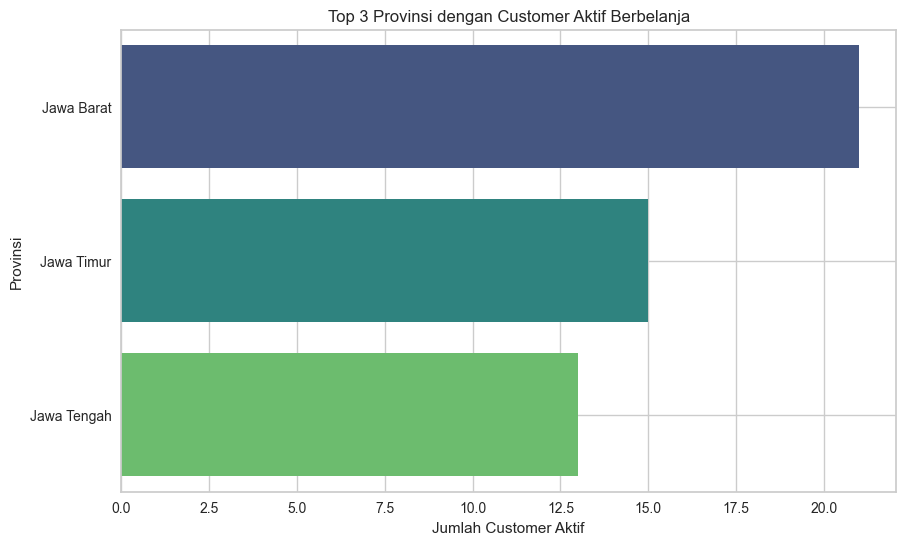

In [ ]:
# Data yang diambil dari top 3 provinsi
top_3_provinsi = top_3_provinsi[['province', 'jumlah_customer_aktif']]

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='jumlah_customer_aktif', y='province', data=top_3_provinsi, palette='viridis')

# Menambahkan judul dan label pada chart
plt.title('Top 3 Provinsi dengan Customer Aktif Berbelanja')
plt.xlabel('Jumlah Customer Aktif')
plt.ylabel('Provinsi')

# Menampilkan grid untuk membantu visualisasi
plt.grid(True)

# Menampilkan chart
plt.show()


3 Provinsi dengan jumlah customer aktif paling banyak adalah : Jawa Barat, Jawa Timur, dan Jawa Tengah

## Data Manipulation

### a.) Binning

Binning digunakan untuk mengubah data numerik menjadi kategorik dengan tujuan untuk membuat data menjadi lebih simpel.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 106
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   registration_id          98 non-null     object 
 1   name                     98 non-null     object 
 2   email                    98 non-null     object 
 3   phone                    98 non-null     float64
 4   age                      98 non-null     float64
 5   income_group             98 non-null     int64  
 6   active                   98 non-null     bool   
 7   city                     98 non-null     object 
 8   province                 98 non-null     object 
 9   hobby                    98 non-null     object 
 10  website_visit_count      98 non-null     int64  
 11  website_recency          98 non-null     int64  
 12  website_purchase_rate    98 non-null     float64
 13  website_purchase_amount  98 non-null     int64  
 14  website_cs_call_count    98 non-

Mengelompokkan kolom age, dengan kelompok produktif, dewasa, dan paruh baya ( 40 - 59 ) namun harus mengetahui rentang umur terlebih dahulu. Rentang umur bisa dicari menggunakan binning

In [ ]:
pd.qcut(df["age"], 3).value_counts()

age
(14.999, 27.0]    36
(38.0, 57.0]      32
(27.0, 38.0]      30
Name: count, dtype: int64

In [ ]:
df.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
0,RK20202344,Fakhrul Fandy Widyaningtias,fakhrulfandywidyaningtias@outlook.com,6.285244e+09,27.0,2,False,Tanjungpinang,Kepulauan Riau,Amateur radio,51,75,0.68,612000,1,True,False,True,True,False
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,Jawa Barat,Animation,88,3,0.51,51000,3,True,False,False,True,False
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,Jakarta,Anime,30,19,0.69,276000,1,False,True,False,True,False
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,Lampung,Aquascaping,63,7,0.80,3200,3,False,True,True,True,True
4,RK20202348,Jeremiah Dinanti,jeremia@rakamin.com,6.285245e+09,25.0,2,False,Malang,Jawa Timur,Art,99,81,0.15,105000,2,True,True,True,True,True


In [ ]:
bins = [14.999, 27.0, 38.0, 57.0]
labels = ['age_group_produktif', 'age_group_dewasa', 'age_group_paruh_baya']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_group_produktif'] = 0
df['age_group_dewasa'] = 0
df['age_group_paruh_baya'] = 0

df.loc[df['age_group'] == 'age_group_produktif', 'age_group_produktif'] = 1
df.loc[df['age_group'] == 'age_group_dewasa', 'age_group_dewasa'] = 1
df.loc[df['age_group'] == 'age_group_paruh_baya', 'age_group_paruh_baya'] = 1

df.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,...,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5,age_group,age_group_produktif,age_group_dewasa,age_group_paruh_baya
0,RK20202344,Fakhrul Fandy Widyaningtias,fakhrulfandywidyaningtias@outlook.com,6.285244e+09,27.0,2,False,Tanjungpinang,Kepulauan Riau,Amateur radio,...,1,True,False,True,True,False,age_group_dewasa,0,1,0
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,Jawa Barat,Animation,...,3,True,False,False,True,False,age_group_dewasa,0,1,0
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,Jakarta,Anime,...,1,False,True,False,True,False,age_group_produktif,1,0,0
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,Lampung,Aquascaping,...,3,False,True,True,True,True,age_group_paruh_baya,0,0,1
4,RK20202348,Jeremiah Dinanti,jeremia@rakamin.com,6.285245e+09,25.0,2,False,Malang,Jawa Timur,Art,...,2,True,True,True,True,True,age_group_produktif,1,0,0


### b.) Clipping ( Handle Outlier )

In [ ]:
df.describe()

,phone,age,income_group,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,age_group_produktif,age_group_dewasa,age_group_paruh_baya
count,9.800000e+01,98.000000,98.000000,98.000000,98.000000,98.000000,9.800000e+01,98.000000,98.000000,98.000000,98.000000
mean,6.170918e+09,32.693878,2.734694,51.336735,20.316327,0.686531,8.663471e+05,0.693878,0.326531,0.326531,0.336735
std,8.041015e+08,11.348653,1.180171,29.288450,19.051529,0.233521,1.783862e+06,1.143409,0.471355,0.471355,0.475023
min,6.284456e+08,15.000000,1.000000,5.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.285245e+09,24.000000,2.000000,23.250000,7.250000,0.610000,1.087500e+05,0.000000,0.000000,0.000000,0.000000
50%,6.287304e+09,32.000000,3.000000,49.500000,17.000000,0.720000,3.285000e+05,0.000000,0.000000,0.000000,0.000000
75%,6.287881e+09,42.000000,4.000000,73.750000,25.000000,0.845000,6.282500e+05,1.000000,1.000000,1.000000,1.000000
max,6.289633e+09,57.000000,5.000000,100.000000,93.000000,1.000000,9.500000e+06,3.000000,1.000000,1.000000,1.000000


insight ( Praduga ) :    

1. Kolom website_recency kemungkinan terdapat high outlier karena rentangnya adalah dari 0 - 93 namun rata-ratanya adalah 20.

2. Kolom website_purchase_amount kemungkinan terdapat outlier karena rentangnya adalah dari 0 - 9.5jt namun rata-ratanya adalah 866rb dengan median 328rb.

Info tambahan :    

e adalah eksponen atau dikali dengan 10 pangkat. jadi e+05 artinya dikali 10 pangkat 5. yang berarti, rentang website_purchase_amount adalah dari 0 - 9.500.000 dan mean nya adalah 866.000

Handle outlier website_recency :

In [ ]:
Q1 = df['website_recency'].quantile(0.25)
Q3 = df['website_recency'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['website_recency'] < lower_bound) | (df['website_recency'] > upper_bound)]
df = df[(df['website_recency'] >= lower_bound) & (df['website_recency'] <= upper_bound)]

Kolom website_recency sudah tidak ada outlier

Handle outlier website_purchase_amount

In [ ]:
Q1 = df['website_purchase_amount'].quantile(0.25)
Q3 = df['website_purchase_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['website_purchase_amount'] < lower_bound) | (df['website_purchase_amount'] > upper_bound)]
df = df[(df['website_purchase_amount'] >= lower_bound) & (df['website_purchase_amount'] <= upper_bound)]

kolom website_purchase_amount yang baru adalah rentang dari 0 - 1.4jt dengan rata-ratanya 437rb ( make sense )

### c.) Scaling

In [ ]:
df.describe()

,phone,age,income_group,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,age_group_produktif,age_group_dewasa,age_group_paruh_baya
count,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000,81.000000,81.000000,81.000000
mean,6.146839e+09,32.382716,2.716049,50.320988,15.086420,0.719506,3.567040e+05,0.691358,0.333333,0.333333,0.320988
std,8.835109e+08,11.475591,1.196187,29.545654,9.471269,0.199499,2.860231e+05,1.158037,0.474342,0.474342,0.469765
min,6.284456e+08,15.000000,1.000000,5.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.285245e+09,23.000000,2.000000,22.000000,6.000000,0.640000,9.900000e+04,0.000000,0.000000,0.000000,0.000000
50%,6.287814e+09,32.000000,3.000000,46.000000,16.000000,0.730000,3.050000e+05,0.000000,0.000000,0.000000,0.000000
75%,6.287881e+09,42.000000,4.000000,74.000000,24.000000,0.870000,5.340000e+05,1.000000,1.000000,1.000000,1.000000
max,6.289633e+09,57.000000,5.000000,100.000000,30.000000,1.000000,1.280000e+06,3.000000,1.000000,1.000000,1.000000


kita mengabaikan kolom "phone" karena semua baris memiliki nomor telepon yang berbeda-beda kecuali jika ada duplikasi, dan kita sudah handle diatas. sekarang kita analisis apakah skala nya merata dari kolom selain kolom phone :     

1. age = 15 - 57
2. income_group = 1 - 5 ( termasuk kategori, jadi tidak usah di scaling )
3. website_visit_count = 5 - 100
4. website_recency = 0 - 93
5. website_purchase_rate = 0 - 1 (persen)
6. website_purchase_amount = 0 - 9.5jt
7. website_cs_call_count = 0 - 3
8. Clipped_website_recency = 0 - 51
9. Clipped_website_purchase_amount = 0 - 1.4jt

Berdasarkan informasi diatas, sudah jelas yang akan kita scaling adalah kolom website_purchase_amount dan Clipped_website_purchase_amount. Namun kita akan membiarkan kolom website_purchase_amount karena sudah digantikan dengan yang tanpa outlier pada kolom Clipped_website_purchase_amount sehingga tidak akan digunakan untuk modelling.

Kita akan melakukan scaling dengan metode StandardScaler karena kolom ini merupakan kolom harga dan tidak menggunakan MinMaxScaler karena tidak ingin mengubah value dari 0 - 1.

std_clipped_website_purchase_amount

In [ ]:
scaler = StandardScaler()
df['std_clipped_website_purchase_amount'] = scaler.fit_transform(df[['website_purchase_amount']])

df.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,...,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5,age_group,age_group_produktif,age_group_dewasa,age_group_paruh_baya,std_clipped_website_purchase_amount
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,Jawa Barat,Animation,...,True,False,False,True,False,age_group_dewasa,0,1,0,-1.075468
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,Jakarta,Anime,...,False,True,False,True,False,age_group_produktif,1,0,0,-0.283917
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,Lampung,Aquascaping,...,False,True,True,True,True,age_group_paruh_baya,0,0,1,-1.243628
6,RK20202350,Okky Oktaviaman,okkyoktaviaman@roketmail.com,6.281906e+09,35.0,3,True,Surakarta,Jawa Tengah,Fashion design,...,False,True,True,False,False,age_group_dewasa,0,1,0,-1.015662
10,RK20202353,Bob Arisa,bobarisa@yahoo.com,6.281909e+09,40.0,4,True,Salatiga,Jawa Tengah,Manga,...,False,True,True,True,True,age_group_paruh_baya,0,0,1,-0.565357


In [ ]:
df["std_clipped_website_purchase_amount"].describe()

count    8.100000e+01
mean     5.345518e-17
std      1.006231e+00
min     -1.254886e+00
25%     -9.066036e-01
50%     -1.818947e-01
75%      6.237283e-01
max      3.248160e+00
Name: std_clipped_website_purchase_amount, dtype: float64

### d.) Encoding

In [ ]:
for i in df:
  print(f'''nilai unik dari kolom {i}''')
  print(df[i].unique())
  print()

nilai unik dari kolom registration_id
['RK20202345' 'RK20202346' 'RK20202347' 'RK20202350' 'RK20202353'
 'RK20202354' 'RK20202358' 'RK20202360' 'RK20202361' 'RK20202362'
 'RK20202364' 'RK20202365' 'RK20202366' 'RK20202368' 'RK20202369'
 'RK20202370' 'RK20202371' 'RK20202372' 'RK20202373' 'RK20202375'
 'RK20202377' 'RK20202378' 'RK20202379' 'RK20202380' 'RK20202381'
 'RK20202382' 'RK20202383' 'RK20202384' 'RK20202385' 'RK20202386'
 'RK20202387' 'RK20202388' 'RK20202389' 'RK20202391' 'RK20202392'
 'RK20202393' 'RK20202394' 'RK20202395' 'RK20202396' 'RK20202398'
 'RK20202399' 'RK20202400' 'RK20202401' 'RK20202402' 'RK20202404'
 'RK20202405' 'RK20202406' 'RK20202407' 'RK20202408' 'RK20202409'
 'RK20202410' 'RK20202411' 'RK20202412' 'RK20202413' 'RK20202414'
 'RK20202415' 'RK20202416' 'RK20202417' 'RK20202418' 'RK20202419'
 'RK20202420' 'RK20202421' 'RK20202422' 'RK20202423' 'RK20202424'
 'RK20202425' 'RK20202426' 'RK20202428' 'RK20202429' 'RK20202430'
 'RK20202431' 'RK20202432' 'RK20202433

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1 to 106
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   registration_id                      81 non-null     object  
 1   name                                 81 non-null     object  
 2   email                                81 non-null     object  
 3   phone                                81 non-null     float64 
 4   age                                  81 non-null     float64 
 5   income_group                         81 non-null     int64   
 6   active                               81 non-null     bool    
 7   city                                 81 non-null     object  
 8   province                             81 non-null     object  
 9   hobby                                81 non-null     object  
 10  website_visit_count                  81 non-null     int64   
 11  website_recency          

Kolom registration_id, name, email, dan phone tidak mungkin di encoding dan tidak akan dijadikan sebagai variabel prediktor pada model karena valuenya unik disetiap baris sehingga tidak akan ditemukan korelasi dan tidak bermanfaat.

Kolom hobby juga tidak akan di encoding dan dijadikan variabel prediktor karena terlalu banyak unique values sehingga tidak berkorelasi. Sama halnya dengan kolom city

**Kolom yang akan di encoding adalah kolom province dan age_group, namun akan kita kelompokkan terlebih dahulu kolom province menjadi kelompok indo_timur, indo_barat, dan indo_tengah.**

Kolom yang lain tidak di encoding karena sudah dalam bentuk angka dan bisa dibaca oleh mesin



Encoding kolom province_group dan age_group

In [ ]:
label_encoder = LabelEncoder()

categorical_columns = ['province', 'age_group' ]

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,...,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5,age_group,age_group_produktif,age_group_dewasa,age_group_paruh_baya,std_clipped_website_purchase_amount
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,2,Animation,...,True,False,False,True,False,0,0,1,0,-1.075468
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,0,Anime,...,False,True,False,True,False,2,1,0,0,-0.283917
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,11,Aquascaping,...,False,True,True,True,True,1,0,0,1,-1.243628
6,RK20202350,Okky Oktaviaman,okkyoktaviaman@roketmail.com,6.281906e+09,35.0,3,True,Surakarta,3,Fashion design,...,False,True,True,False,False,0,0,1,0,-1.015662
10,RK20202353,Bob Arisa,bobarisa@yahoo.com,6.281909e+09,40.0,4,True,Salatiga,3,Manga,...,False,True,True,True,True,1,0,0,1,-0.565357


Sebelum melakukan modelling, pastikan kita sudah mengambil kolom" yang SIAP untuk dijadikan sebagai variabel prediktor dan target. AYO KITA FILTER !

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1 to 106
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   registration_id                      81 non-null     object 
 1   name                                 81 non-null     object 
 2   email                                81 non-null     object 
 3   phone                                81 non-null     float64
 4   age                                  81 non-null     float64
 5   income_group                         81 non-null     int64  
 6   active                               81 non-null     bool   
 7   city                                 81 non-null     object 
 8   province                             81 non-null     int64  
 9   hobby                                81 non-null     object 
 10  website_visit_count                  81 non-null     int64  
 11  website_recency                      8

Kita tidak akan mengambil kolom :    

1. registration_id, name, email, phone, age ( sudah ada age_group yang di encoding ), city, province ( sudah ada province_group yang di encoding ), hobby, website_recency ( ssudah ada Clipped_website_recency ), website_purchase_amount serta Clipped_website_purchase_amount ( sudah ada std_clipped_website_purchase_amount ), age_group dan province_group(sudah di encoding)

In [ ]:
ceklis = ['registration_id', 'name', 'email', 'phone', 'age', 'city', 'province', 'hobby', 'website_recency',
          'website_purchase_amount', 'Clipped_website_purchase_amount']
for i in df.columns:
    if i not in ceklis:
        print(i)

income_group
active
website_visit_count
website_purchase_rate
website_cs_call_count
accept_campaign_1
accept_campaign_2
accept_campaign_3
accept_campaign_4
accept_campaign_5
age_group
age_group_produktif
age_group_dewasa
age_group_paruh_baya
std_clipped_website_purchase_amount


In [ ]:
column_train = df[['income_group', 'active', 'website_visit_count', 'website_purchase_rate', 'website_cs_call_count', 'accept_campaign_1',
                   'accept_campaign_2', 'accept_campaign_3', 'accept_campaign_4', 'accept_campaign_5', 'age_group', 'age_group_produktif',
                   'age_group_dewasa', 'age_group_paruh_baya', 'std_clipped_website_purchase_amount']]

# Modelling

## Modelling preparation

Kita mempunyai 1 Task yang diberikan, yaitu membuat mesin prediksi apakah customer yang datang dan beraktivitas di website perusahaan berpeluang menggunakan jenis promosi yang mana antara promosi ke 1 - 5.

Kita menggunakan hasil_df, bukan df

membagi data menjadi data train dan data test

In [ ]:
hasil_df = column_train

## Modelling

In [ ]:
hasil_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1 to 106
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   income_group                         81 non-null     int64  
 1   active                               81 non-null     bool   
 2   website_visit_count                  81 non-null     int64  
 3   website_purchase_rate                81 non-null     float64
 4   website_cs_call_count                81 non-null     int64  
 5   accept_campaign_1                    81 non-null     bool   
 6   accept_campaign_2                    81 non-null     bool   
 7   accept_campaign_3                    81 non-null     bool   
 8   accept_campaign_4                    81 non-null     bool   
 9   accept_campaign_5                    81 non-null     bool   
 10  age_group                            81 non-null     int64  
 11  age_group_produktif                  8

In [ ]:
hasil_df['active'] = hasil_df['active'].astype(int)

C:\Users\windows\AppData\Local\Temp\ipykernel_13672\871325653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasil_df['active'] = hasil_df['active'].astype(int)


In [ ]:
X = hasil_df.drop(columns=['accept_campaign_1',	'accept_campaign_2', 'accept_campaign_3', 'accept_campaign_4', 'accept_campaign_5'])
y = hasil_df[['accept_campaign_1',	'accept_campaign_2', 'accept_campaign_3', 'accept_campaign_4', 'accept_campaign_5']]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 10), (17, 10), (64, 5), (17, 5))

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="minmax"), ['income_group', 'active', 'website_visit_count', 'website_purchase_rate', 'website_cs_call_count',
                                             'age_group', 'age_group_produktif', 'age_group_dewasa', 'age_group_paruh_baya',
                                             'std_clipped_website_purchase_amount']),
    # ('categoric', cat_pipe(encoder="onehot"), ['Weather', 'Road_Type', 'Time_of_Day', 'Road_Condition', 'Vehicle_Type',
    #                                            'Road_Light_Condition']),
])

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, max_features=5, max_leaf_nodes=3, random_state=42, min_samples_leaf=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=5, max_leaf_nodes=3,
                       min_samples_leaf=3, random_state=42)

In [ ]:
X_test[2:3]

,income_group,active,website_visit_count,website_purchase_rate,website_cs_call_count,age_group,age_group_produktif,age_group_dewasa,age_group_paruh_baya,std_clipped_website_purchase_amount
36,2,1,45,0.53,0,2,1,0,0,-0.322615


In [ ]:
prediksi_dt = dt.predict(X_test)

In [ ]:
prediksi_dt[2:3]

array([[ True,  True, False, False,  True]])

Belum terdapat kolom - kolom target, yaitu "accept_campaign_1", "accept_campaign_2", "accept_campaign_3", "accept_campaign_4", "accept_campaign_5" karena merupakan data variabel prediktor test, khusunya pada data test indeks ke-2

In [ ]:
y_test_pred_dt = dt.predict(X_test[2:3])

In [ ]:
y_test_pred_dt

array([[ True,  True, False, False,  True]])

Artinya mesin memprediksi bahwa pelanggan dengan indeks ke-2 pada data test adalah pelanggan yang diprediksi suka menggunakan rpomo / campaign ke 3,4,5 atau promo flash sale, free ongkir, dan cashback 30%

## Modelling Evaluation

In [ ]:
# import libraries
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, silhouette_score

recall dan precision menggunakan parameter micro. micro: Menghitung metrik global dengan meringkas semua label.

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
accuracy = accuracy_score(y_true, y_pred)

Precision (macro): 0.4786
Recall (macro): 0.3944


In [ ]:
# warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("Decision Tree Evaluation : \n")

print("Decision Tree without Hyperparameter tunning : ")
report_DT = classification_report(y_test, y_pred_dt)
print("Classification Report:")
print(report_DT)

cm_DT = multilabel_confusion_matrix(y_test, y_pred_dt)
print("\nMultilabel Confusion Matrix DT:")
print(cm_DT)
print("\nDT without Hyperparameter tunning :")
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")

Decision Tree Evaluation : 

Decision Tree with Hyperparameter tunning Randomized Search CV : 
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.62      0.62      0.62         8
           2       0.71      0.56      0.62         9
           3       0.43      0.38      0.40         8
           4       0.00      0.00      0.00         6

   micro avg       0.58      0.42      0.49        43
   macro avg       0.48      0.39      0.43        43
weighted avg       0.52      0.42      0.46        43
 samples avg       0.27      0.34      0.29        43


Multilabel Confusion Matrix DT:
[[[ 2  3]
  [ 7  5]]

 [[ 6  3]
  [ 3  5]]

 [[ 6  2]
  [ 4  5]]

 [[ 5  4]
  [ 5  3]]

 [[10  1]
  [ 6  0]]]

DT with Hyperparameter tunning Randomized Search CV Evaluation :
Precision (macro): 0.4786
Recall (macro): 0.3944
F1-Score (macro): 0.4300


c:\Users\windows\Documents\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Jika hasil akurasi, precision, recall dirasa kurang memuaskan maka dianjurkan untuk melakukan data addition dengan manipulasi data, seperti melakukan :    

1. Encoding kolom income_group dan active
2. Melakukan pengelompokkan ( Binning )pada kolom website_visit_count ( misal megelompokkan menjadi jarang, sering, dan sangat sering ) lalu di encoding lagi hasilnya agar bisa dibaca oleh mesin
3. Melakukan pengelompokkan pada kolom city ( misal megelompokkan menjadi kota_barat, kota_tengah, dan kota timur ) lalu di encoding lagi hasilnya agar bisa dibaca oleh mesin
4. dst.

In [ ]:
# Gunakan XGB
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
print("XGB Evaluation : \n")

print("XGB without Hyperparameter tunning : ")
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:")
print(report_xgb)

cm_xgb = multilabel_confusion_matrix(y_test, y_pred_xgb)
print("\nMultilabel Confusion Matrix xgb:")
print(cm_xgb)
print("\nxgb without Hyperparameter tunning :")
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")

XGB Evaluation : 

XGB with Hyperparameter tunning Randomized Search CV : 
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.55      0.75      0.63         8
           2       0.60      0.67      0.63         9
           3       0.33      0.38      0.35         8
           4       0.33      0.67      0.44         6

   micro avg       0.45      0.49      0.47        43
   macro avg       0.44      0.53      0.46        43
weighted avg       0.45      0.49      0.44        43
 samples avg       0.43      0.40      0.40        43


Multilabel Confusion Matrix xgb:
[[[ 2  3]
  [10  2]]

 [[ 4  5]
  [ 2  6]]

 [[ 4  4]
  [ 3  6]]

 [[ 3  6]
  [ 5  3]]

 [[ 3  8]
  [ 2  4]]]

xgb with Hyperparameter tunning Randomized Search CV Evaluation :
Precision (macro): 0.4786
Recall (macro): 0.3944
F1-Score (macro): 0.4300


In [ ]:
# With Hyperparameter Bayes Search CV
pipeline_xgb = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier())
])
model_xgb = pipeline_xgb.fit(X_train, y_train)
# model_xgb_bayes = BayesSearchCV(pipeline, bsp.xgb_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
# model_xgb_bayes.fit(X_train, y_train)

# print(model_xgb_bayes.best_params_)
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_test, y_test))

1.0
0.058823529411764705


In [ ]:
# With Hyperparameter Bayes Search CV
pipeline_xgb = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier())
])
model_xgb_bayes = BayesSearchCV(pipeline_xgb, bsp.xgb_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_xgb_bayes.fit(X_train, y_train)

print(f'best parameter : {model_xgb_bayes.best_params_}')
print(f'Score Training : {model_xgb.score(X_train, y_train)}')
print(f'Score Testing  : {model_xgb.score(X_test, y_test)}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

# **Saya coba cara saya**

In [ ]:
train_df = pd.read_csv("https://raw.githubusercontent.com/krishna0604/dataset_advanced/refs/heads/main/data_customers_csv.csv")
train_df.head()

,registration_id,name,email,phone,age,income_group,active,city,province,hobby,...,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
0,RK20202344,Fakhrul Fandy Widyaningtias,fakhrulfandywidyaningtias@outlook.com,6.285244e+09,27.0,2,False,Tanjungpinang,Kepulauan Riau,Amateur radio,...,51,75,0.68,612000,1,True,False,True,True,False
1,RK20202345,Ferdiansyah Amalina,ferdiansyahamalina@yahoo.com,6.285245e+09,31.0,3,True,Bogor,Jawa Barat,Animation,...,88,3,0.51,51000,3,True,False,False,True,False
2,RK20202346,Ficky Rizkyananta,fickyrizkyananta@hotmail.com,6.285245e+09,15.0,1,True,Kota Administrasi Jakarta Pusat,Jakarta,Anime,...,30,19,0.69,276000,1,False,True,False,True,False
3,RK20202347,Singgih Kharisma,singgihkharisma@hotmail.com,6.285245e+09,49.0,4,True,Metro,Lampung,Aquascaping,...,63,7,0.80,3200,3,False,True,True,True,True
4,RK20202348,Jeremiah Dinanti,jeremia@rakamin.com,6.285245e+09,25.0,2,False,Malang,Jawa Timur,Art,...,99,81,0.15,105000,2,True,True,True,True,True


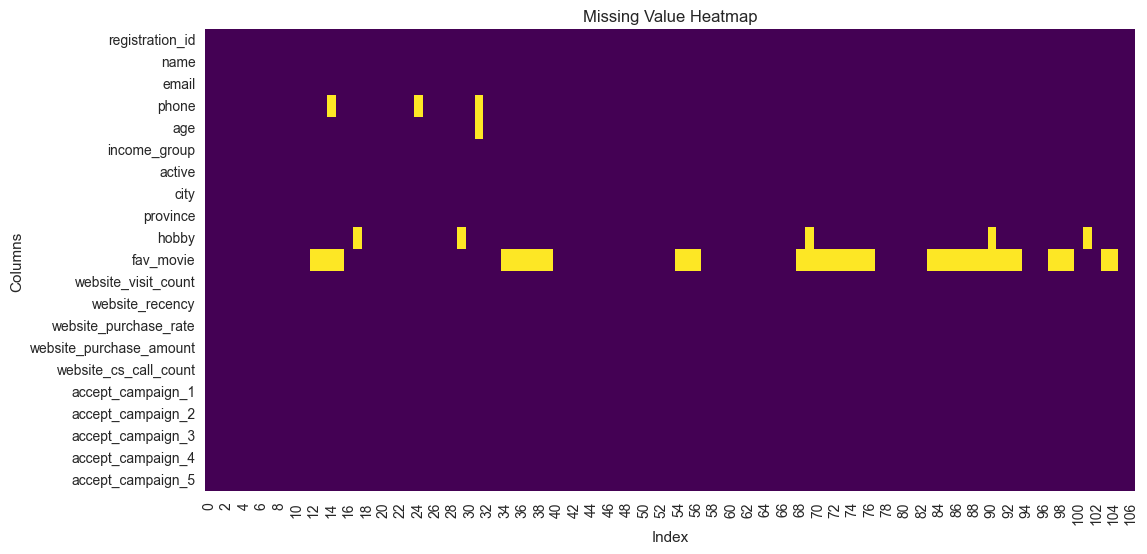

In [ ]:
# Cek apakah datanya ada yang kosong apa tidak :
train_df_transpose = train_df.T

plt.figure(figsize=(12, 6))
sns.heatmap(train_df_transpose.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()

In [ ]:
train_df.columns

Index(['registration_id', 'name', 'email', 'phone', 'age', 'income_group',
       'active', 'city', 'province', 'hobby', 'fav_movie',
       'website_visit_count', 'website_recency', 'website_purchase_rate',
       'website_purchase_amount', 'website_cs_call_count', 'accept_campaign_1',
       'accept_campaign_2', 'accept_campaign_3', 'accept_campaign_4',
       'accept_campaign_5'],
      dtype='object')

Dalam membuat model untuk memprediksi accept campaign, kita akan membuang kolom yang tidak digunakan yaitu registration_id, name, email, phone, hobby, fav movie,

In [ ]:
train_df.drop(columns=['registration_id', 'name', 'email', 'phone', 'hobby', 'fav_movie'], inplace=True)

In [ ]:
bool_columns = train_df.select_dtypes(include=['bool']).columns

In [ ]:
train_df[bool_columns] = train_df[bool_columns].astype(int)

In [ ]:
train_df.head()

,age,income_group,active,city,province,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
0,27.0,2,0,Tanjungpinang,Kepulauan Riau,51,75,0.68,612000,1,1,0,1,1,0
1,31.0,3,1,Bogor,Jawa Barat,88,3,0.51,51000,3,1,0,0,1,0
2,15.0,1,1,Kota Administrasi Jakarta Pusat,Jakarta,30,19,0.69,276000,1,0,1,0,1,0
3,49.0,4,1,Metro,Lampung,63,7,0.80,3200,3,0,1,1,1,1
4,25.0,2,0,Malang,Jawa Timur,99,81,0.15,105000,2,1,1,1,1,1


In [ ]:
train_df.isnull().sum()

age                        1
income_group               0
active                     0
city                       0
province                   0
website_visit_count        0
website_recency            0
website_purchase_rate      0
website_purchase_amount    0
website_cs_call_count      0
accept_campaign_1          0
accept_campaign_2          0
accept_campaign_3          0
accept_campaign_4          0
accept_campaign_5          0
dtype: int64

In [ ]:
train_df = train_df.drop_duplicates()

In [ ]:
most_frequent_value = train_df['age'].mode()[0]
train_df['age'] = train_df['age'].fillna(most_frequent_value)

In [ ]:
train_df.shape[0]

101

In [ ]:
train_df.select_dtypes(include=[object]).columns

Index(['city', 'province'], dtype='object')

In [ ]:
# Label Encoding Data yang kategorik
label_encoder = LabelEncoder()

categorical_columns = ['city', 'province']

for column in categorical_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])

train_df.head()

,age,income_group,active,city,province,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
0,27.0,2,0,39,10,51,75,0.68,612000,1,1,0,1,1,0
1,31.0,3,1,10,2,88,3,0.51,51000,3,1,0,0,1,0
2,15.0,1,1,17,0,30,19,0.69,276000,1,0,1,0,1,0
3,49.0,4,1,24,11,63,7,0.80,3200,3,0,1,1,1,1
4,25.0,2,0,23,4,99,81,0.15,105000,2,1,1,1,1,1


In [ ]:
train_df.head()

,age,income_group,active,city,province,website_visit_count,website_recency,website_purchase_rate,website_purchase_amount,website_cs_call_count,accept_campaign_1,accept_campaign_2,accept_campaign_3,accept_campaign_4,accept_campaign_5
0,27.0,2,0,39,10,51,75,0.68,612000,1,1,0,1,1,0
1,31.0,3,1,10,2,88,3,0.51,51000,3,1,0,0,1,0
2,15.0,1,1,17,0,30,19,0.69,276000,1,0,1,0,1,0
3,49.0,4,1,24,11,63,7,0.80,3200,3,0,1,1,1,1
4,25.0,2,0,23,4,99,81,0.15,105000,2,1,1,1,1,1


In [ ]:
X = hasil_df.drop(columns=['accept_campaign_1',	'accept_campaign_2', 'accept_campaign_3', 'accept_campaign_4', 'accept_campaign_5'])
y = hasil_df[['accept_campaign_1',	'accept_campaign_2', 'accept_campaign_3', 'accept_campaign_4', 'accept_campaign_5']]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 10), (17, 10), (64, 5), (17, 5))

In [ ]:
# Disini saya menggunakan scaler robust, dimana robust ini bisa tahan terhadap outliers
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="robust"), X_train.columns)
])

In [ ]:
rf = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier(n_estimators=100))
])

rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
0.11764705882352941


In [ ]:
xgb = Pipeline([
    ("prep", preprocessor),
    ("algo", XGBClassifier())
])

xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

1.0
0.058823529411764705


In [ ]:
# With Hyperparameter Randomized Search CV
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_random = RandomizedSearchCV(pipeline, rsp.rf_params, n_iter = 50, cv=5, n_jobs=-1, verbose=1)
model_rf_random.fit(X_train, y_train)

print(model_rf_random.best_params_)

print(model_rf_random.score(X_train, y_train), model_rf_random.best_score_, model_rf_random.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__max_depth': 30, 'algo__max_features': np.float64(0.7683475966141962), 'algo__min_samples_leaf': 1, 'algo__n_estimators': 125}
1.0 0.06282051282051282 0.11764705882352941


In [ ]:
# With Hyperparameter Randomized Search CV
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_grid = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model_rf_grid.fit(X_train, y_train)

print(model_rf_grid.best_params_)
print(model_rf_grid.score(X_train, y_train), model_rf_grid.best_score_, model_rf_grid.score(X_test, y_test))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'algo__max_depth': 80, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 100}
1.0 0.11025641025641027 0.11764705882352941


In [ ]:
# With Hyperparameter Randomized Search CV
pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

model_rf_bayes = BayesSearchCV(pipeline, bsp.rf_params, n_iter=100, cv=3, n_jobs=-1, verbose=1)
model_rf_bayes.fit(X_train, y_train)

print(model_rf_bayes.best_params_)
print(model_rf_bayes.score(X_train, y_train), model_rf_bayes.best_score_, model_rf_bayes.score(X_test, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
y_pred_rf = rf.predict(X_test)

Distribusi Class lebih bagus, walaupun di data ke-0 itu imbalanced(yaitu pada accept_campaign_1), untuk hasil lebih baik bisa menambahkan feature kelas 0, yaitu Accept Campaign 1, atau bisa melakukan metode SMOTE atau IMBLEARN pada dataset

In [ ]:
# Best Model
print("Random Forest Evaluation : \n")
print("Random Forest without Hyperparameter tunning : ")
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report_rf)

cm_rf = multilabel_confusion_matrix(y_test, y_pred_rf)
print("\nMultilabel Confusion Matrix rf:")
print(cm_rf)
print("\nrf without Hyperparameter tunning Evaluation :")
print(f"Precision (macro): {precision_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")

Random Forest Evaluation : 

Random Forest without Hyperparameter tunning Randomized Search CV : 
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       0.60      0.75      0.67         8
           2       0.56      0.56      0.56         9
           3       0.44      0.50      0.47         8
           4       0.33      0.50      0.40         6

   micro avg       0.49      0.44      0.46        43
   macro avg       0.49      0.48      0.45        43
weighted avg       0.50      0.44      0.42        43
 samples avg       0.43      0.35      0.37        43


Multilabel Confusion Matrix rf:
[[[ 4  1]
  [11  1]]

 [[ 5  4]
  [ 2  6]]

 [[ 4  4]
  [ 4  5]]

 [[ 4  5]
  [ 4  4]]

 [[ 5  6]
  [ 3  3]]]

rf with Hyperparameter tunning Randomized Search CV Evaluation :
Precision (macro): 0.4786
Recall (macro): 0.3944
F1-Score (macro): 0.4300


c:\Users\windows\Documents\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
